In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/weatherHistory.csv')

In [ ]:
data = pd.DataFrame(data)


In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data.shape

In [ ]:
relation = data[['Temperature (C)', 'Humidity']]

In [ ]:
relation.head()

In [ ]:
relation.shape

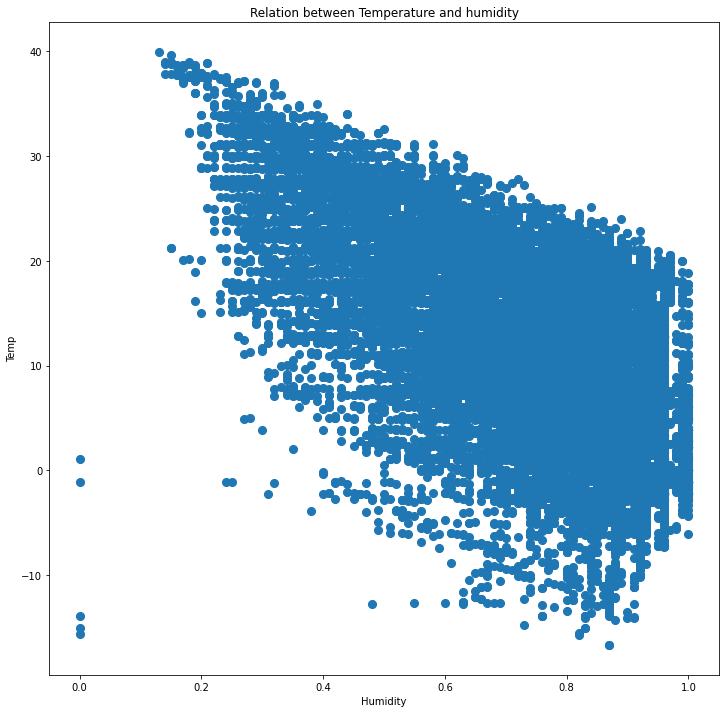

In [ ]:
plt.figure(figsize= (12,12))
plt.scatter( relation['Humidity'],relation['Temperature (C)'], s=65)
plt.xlabel('Humidity')
plt.ylabel('Temp')
plt.title('Relation between Temperature and humidity')
plt.show()

In [ ]:
new_relation = relation[:][:1000]
len(new_relation)

1000

In [ ]:
new_relation['Temperature (C)'].isna().sum()
new_relation['Humidity'].isna().sum()

0

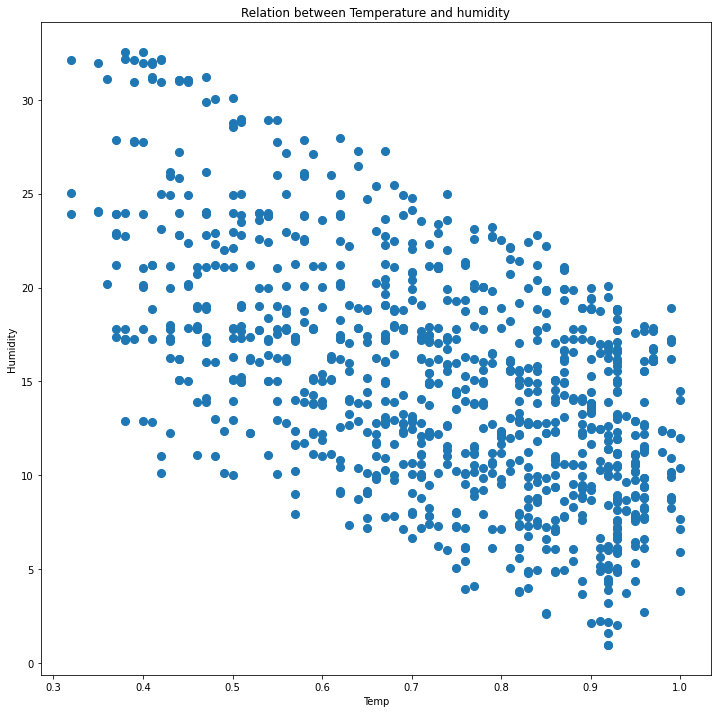

In [ ]:
plt.figure(figsize= (12,12))
plt.scatter( new_relation['Humidity'],new_relation['Temperature (C)'], s=65)
plt.xlabel('Temp')
plt.ylabel('Humidity')
plt.title('Relation between Temperature and humidity')
plt.show()

In [ ]:
relation_TAH = data[['Humidity','Apparent Temperature (C)']]

In [ ]:
relation_TAH.head()

,Humidity,Apparent Temperature (C)
0,0.89,7.388889
1,0.86,7.227778
2,0.89,9.377778
3,0.83,5.944444
4,0.83,6.977778


In [ ]:
relation_TAH.shape

(30711, 2)

In [ ]:
relation_TAH['Humidity'].isna().sum()
relation_TAH['Apparent Temperature (C)'].isna().sum()

0

In [ ]:
X = relation_TAH.iloc[: , :1]
Y = relation_TAH.iloc[: ,-1]

In [ ]:
print(X)
X.shape

       Humidity
0          0.89
1          0.86
2          0.89
3          0.83
4          0.83
...         ...
30706      0.56
30707      0.55
30708      0.53
30709      0.53
30710      0.43

[30711 rows x 1 columns]


(30711, 1)

In [ ]:
print(Y)
Y.shape

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
30706    18.888889
30707    19.638889
30708    21.111111
30709    21.111111
30710    22.344444
Name: Apparent Temperature (C), Length: 30711, dtype: float64


(30711,)

In [ ]:
# Splitting the dataset into training data and test data
X_train , X_test , Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

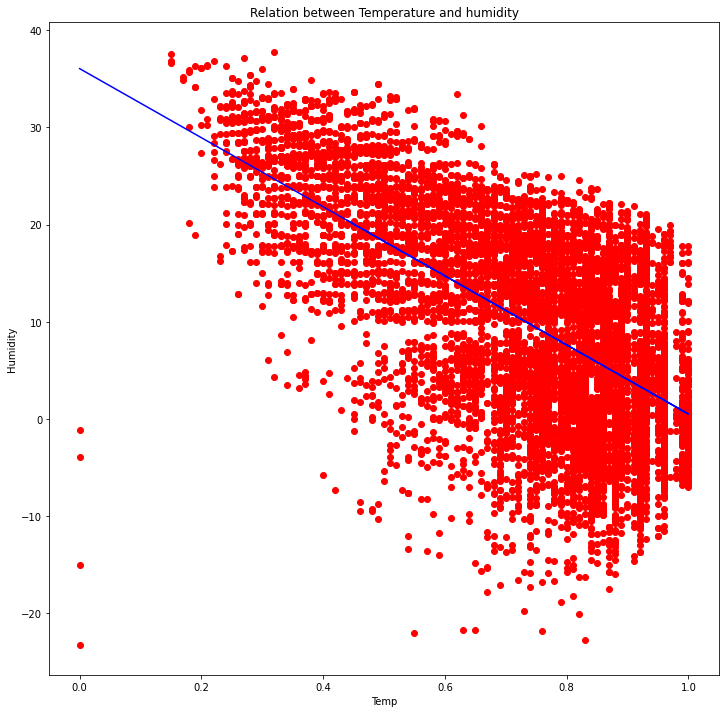

In [ ]:
plt.figure(figsize= (12,12))
plt.scatter(X_test,Y_test, color ='red')
plt.plot( X_test,lin_reg.predict(X_test),color='blue')
plt.xlabel('Temp')
plt.ylabel('Humidity')
plt.title('Relation between Temperature and humidity')
plt.show()

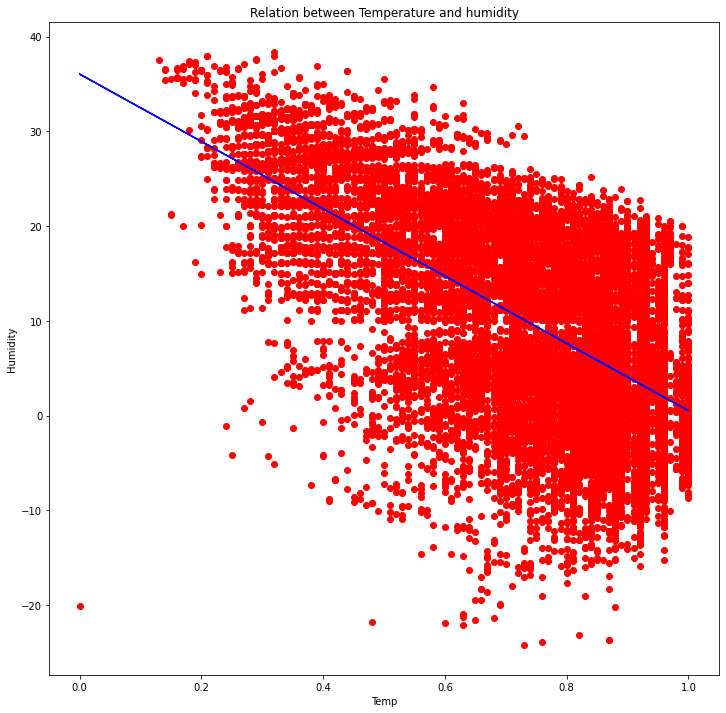

In [ ]:
plt.figure(figsize= (12,12))
plt.scatter(X_train,Y_train, color ='red')
plt.plot( X_train,lin_reg.predict(X_train),color='blue')
plt.xlabel('Temp')
plt.ylabel('Humidity')
plt.title('Relation between Temperature and humidity')
plt.show()

In [ ]:
score_1 = metrics.r2_score(Y_train, lin_reg.predict(X_train))

print("R square value: ",score_1)

R square value:  0.3960478855820877


In [ ]:
temp_predict = lin_reg.predict([[0.8]])
print(temp_predict)

[7.62864633]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
